Download DATA

In [27]:
#setups
#name startdate, enddate
#split info
#seuqnce info, lenght input / ouput


In [28]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
ftse100_tickers = {
    "IAG", "MRO", "BAB", "RTO", "SPX", "ENT", "RKT", "BNZL", "HSBA", "HLN",
    "SGE", "SMT", "RR", "HLMA", "EDV", "BA", "BARC", "SHEL", "CPG", "FRES",
    "EXPN", "IHG", "AAL", "EZJ", "LSEG", "HSX", "WPP", "ABF", "RMV", "BTRW",
    "ANTO", "RIO", "PSH", "AUTO", "DPLM", "BKG", "AZN", "GAW", "PSN", "NWG",
    "CRDA", "AV", "FCIT", "AHT", "MNG", "WEIR", "REL", "AAF", "DCC", "MNDI",
    "DGE", "STJ", "ITRK", "TW", "ICG", "GLEN", "SMIN", "CCEP", "PRU", "LGEN",
    "ULVR", "CCH", "PCT", "INF", "III", "ALW", "PSON", "IMI", "PHNX", "NXT",
    "HIK", "JD", "SN", "CNA", "CTEC", "ADM", "SGRO", "BP", "IMB", "STAN",
    "LMP", "UTG", "BATS", "TSCO", "LAND", "NG", "SDR", "HWDN", "BT-A", "MKS",
    "BEZ", "SSE", "GSK", "LLOY", "VOD", "KGF", "SVT", "WTB", "UU", "SBRY"
}

In [30]:
start_dat = "2005-01-04"
end_dat = datetime.today().strftime('%Y-%m-%d')#"2025-05-07"
company = 'BAB'+".L"

In [31]:
#prepare data for for next part
def get_data(comapny, startdate, enddate,interval1="1d"):
    df_og = yf.download(comapny, start= startdate, 
                    end= enddate, interval=interval1)
    #index in this case is date, for easier manipulation we want it as a column
    
    df_og.columns = df_og.columns.get_level_values(0) 
    
    df_og = df_og.reset_index()
    # Ensure 'Date' is in datetime format
    df_og['Date'] = pd.to_datetime(df_og['Date'])

    return df_og 

In [32]:
data1 = get_data(company, start_dat, end_dat)
data1.columns

[*********************100%***********************]  1 of 1 completed


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [33]:
n_input = 360*5
n_output = 1
split1 = 0.6

In [34]:
# Plotting the actual prices to study company
def show_stattics_histogram(data):
    
    # plt.figure(figsize=(20, 15))
    # data.hist(bins=50, figsize=(20, 15))
    # data.plot(figsize=(20, 15))
    data.plot(kind='line', x='Date', y='Close', figsize=(10, 5), title=ti)

    plt.title("Price History")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.show()
    

    for col in data.columns:
        print("Column: ", col)
        # if col != data.columns[0]:
            # data[col].plot(kind='kde', figsize=(20, 15))

    # print("Data shape: ", data.shape)
    # print("Data columns: ", data.columns)
    # print("Data head: ", data.head())
    # print("Data tail: ", data.tail())
    # print("Data info: ", data.info())
    # print("Data describe: ", data.describe())


In [35]:
# # show_stattics_histogram(data1)
# plt.figure(figsize=(20, 15))
# plt.plot(data1['Date'], data1['Close'], alpha=0.5, label='Close Price')
# plt.plot(data1['Date'], data1['Volume'], alpha=0.5, label='Volume')
# # data1.plot(kind='line', x='Date', y='Close')#, figsize=(10, 5), title="Price History",xlabel="Date", ylabel="Price")
# # data1.plot(kind='line', x='Date', y='Volume')#, figsize=(10, 5), title="Price History",xlabel="Date", ylabel="Price")
# plt.grid()
# plt.show()

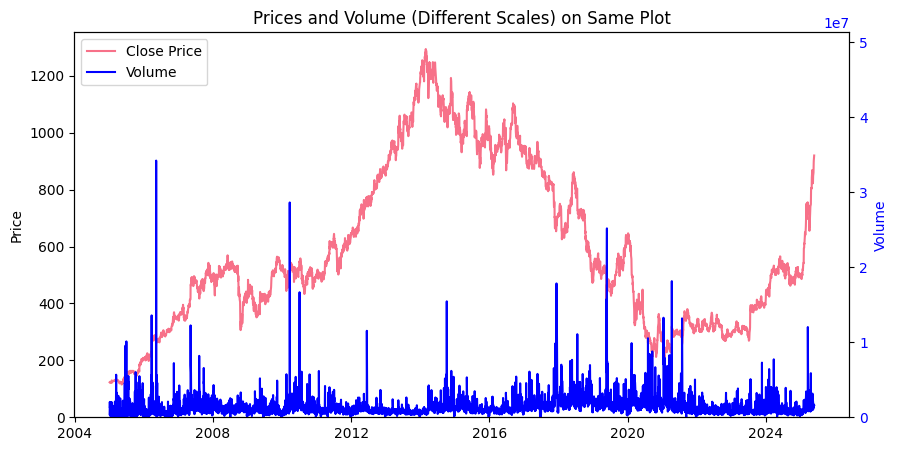

In [36]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Volume on the right y-axis
ax2 = ax1.twinx()
ax2.plot(data1['Date'], data1['Volume'], color='b', label='Volume')
ax2.set_ylabel('Volume', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_ylim(bottom=0, top=data1['Volume'].max() * 1.5)

# Plot each price column on the left y-axis with different color
price_cols = [col for col in data1.columns if 
              col not in ['Date','Open','Volume', 'High', 'Low']]
colors = sns.color_palette("husl", len(price_cols))

for col, color in zip(price_cols, colors):
    ax1.plot(data1['Date'], data1[col], color=color, label=col + ' Price')
    
ax1.set_ylabel('Price')
ax1.tick_params(axis='y')
ax1.set_ylim(bottom=0)

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title("Prices and Volume (Different Scales) on Same Plot")
plt.show()

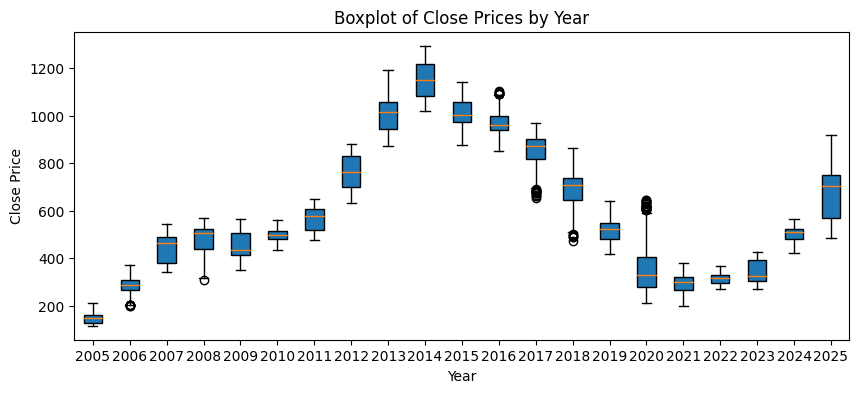

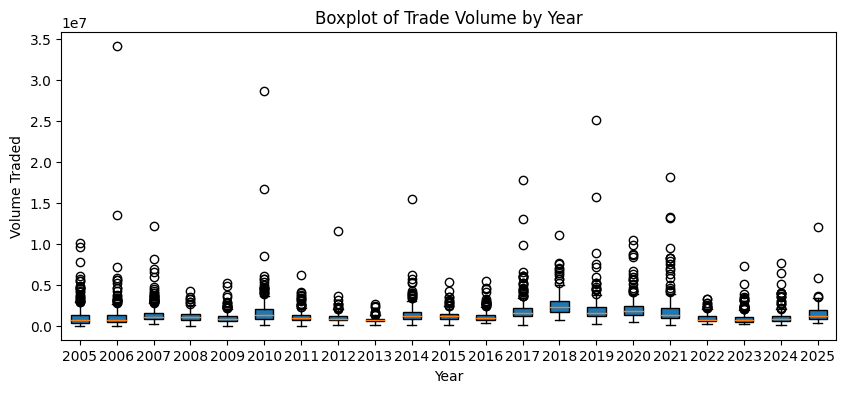

In [37]:
# Ensure 'Date' is datetime
data1['Year'] = data1['Date'].dt.year

# Create a list of Close data for each year
years = sorted(data1['Year'].unique())
data_by_year = [data1[data1['Year'] == year]['Close'].dropna() for year in years]

plt.figure(figsize=(10, 4))
plt.boxplot(data_by_year, labels=years, patch_artist=True)
plt.ylabel('Close Price')
plt.title('Boxplot of Close Prices by Year')
plt.xlabel('Year')
plt.show()
# Ensure 'Date' is datetime and extract year
data1['Date'] = pd.to_datetime(data1['Date'])
data1['Year'] = data1['Date'].dt.year

# Prepare data: list of 'Volume' for each year
# years = sorted(data1['Year'].unique())
data_by_year = [data1[data1['Year'] == year]['Volume'].dropna() for year in years]

plt.figure(figsize=(10, 4))
plt.boxplot(data_by_year, labels=years, patch_artist=True)
plt.ylabel('Volume Traded')
plt.title('Boxplot of Trade Volume by Year')
plt.xlabel('Year')
plt.show()
data1.drop(columns=['Year'], inplace=True)

In [ ]:
# Assuming data1 is already defined and has Date, ChangeClose, Volume columns
 #Check for weekends and holidays
data1['prev_date'] = data1['Date'].shift(1)
data1['date_diff'] = (data1['Date'] - data1['prev_date']).dt.days

data1['WeekendOff'] = data1['date_diff'] > 1

# Calculate the percentage change in 'Close' price
data1['prev_Close'] = data1['Close'].shift(1)
data1['ChangeClose'] = abs( data1['Close'] - data1['prev_Close'])
# data1['ChangeClose'].iloc[0] = 0  
data1.loc[0, "ChangeClose"] = 0

data1.drop(columns=['prev_date', 'date_diff','prev_Close'], inplace=True)



In [62]:

# Prepare data
data1['Year'] = data1['Date'].dt.year
years = sorted(data1['Year'].unique())

data_by_year = [data1[data1['Year'] == year]['ChangeClose'].dropna() for year in years]

# High volume calculation
data1['HighVolume'] = data1['Volume'] > 5000000
yearly_stats = data1.groupby('Year').agg(
    total_days=('Date', 'count'),
    high_volume_days=('HighVolume', 'sum')
)
yearly_stats['percent_high_volume'] = (yearly_stats['high_volume_days'] / yearly_stats['total_days']) * 100

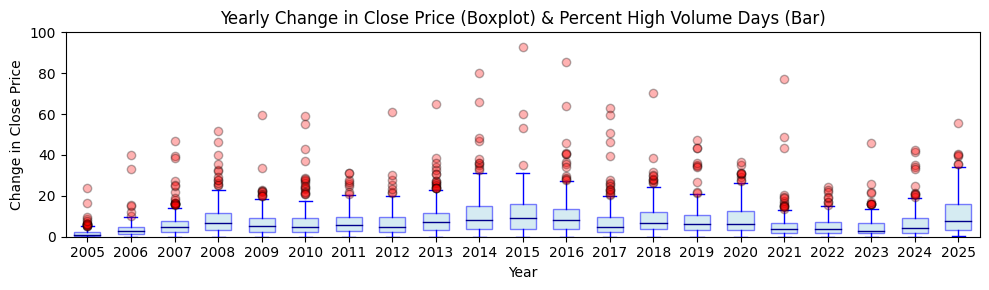

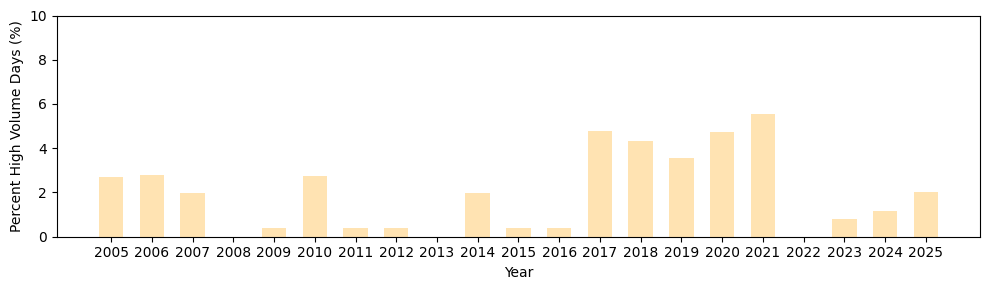

In [82]:
# Plot
fig, ax1 = plt.subplots(figsize=(10, 3))

# Boxplot on left y-axis
box = ax1.boxplot(
    data_by_year,
    positions=np.arange(len(years)),
    patch_artist=True,
    widths=0.6,
    boxprops=dict(facecolor='lightblue', color='blue', alpha=0.5),
    medianprops=dict(color='darkblue'),
    whiskerprops=dict(color='blue'),
    capprops=dict(color='blue'),
    flierprops=dict(markerfacecolor='red', marker='o', alpha=0.3)
)
ax1.set_ylabel('Change in Close Price')
ax1.set_xlabel('Year')
ax1.set_xticks(np.arange(len(years)))
ax1.set_xticklabels(years)
ax1.set_title('Yearly Change in Close Price (Boxplot) & Percent High Volume Days (Bar)')
ax1.set_ylim(0, 100)



plt.tight_layout()
plt.show()
# Bar plot on right y-axis
fig, ax1 = plt.subplots(figsize=(10, 3))
# ax1 = ax1.twinx()
bar = ax1.bar(
    np.arange(len(years)),
    yearly_stats['percent_high_volume'].reindex(years).fillna(0),
    alpha=0.3, width=0.6,
    color='orange',
    label='Percent High Volume Days'
)
ax1.set_ylabel('Percent High Volume Days (%)')
ax1.set_ylim(0, 10)
ax1.set_xlabel('Year')
ax1.set_xticks(np.arange(len(years)))
ax1.set_xticklabels(years)
# Legends
# ax1.legend([box["boxes"][0]], ['ChangeClose (boxplot)'], loc='upper left')
# ax2.legend([bar], ['% High Volume Days'], loc='upper right')
# Show the plot
plt.tight_layout()
plt.show()


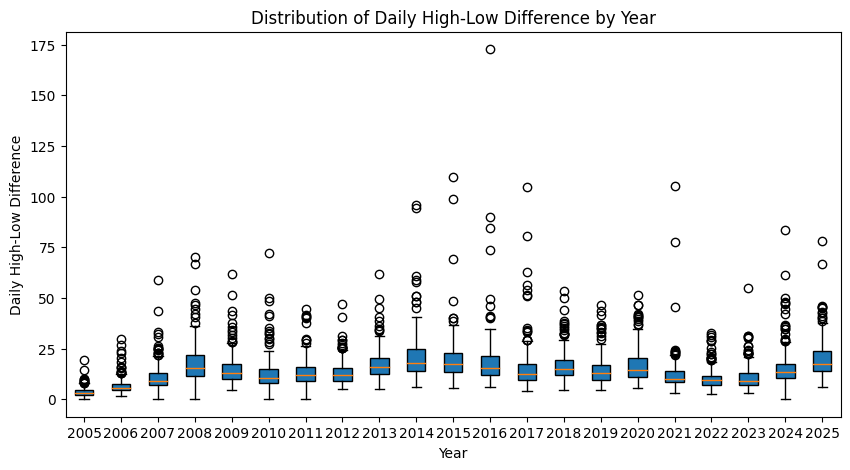

In [64]:
# 1. Calculate the difference for each row
data1['HighLowDiff'] = data1['High'] - data1['Low']

# 2. Prepare data for boxplot
years = sorted(data1['Year'].unique())
diffs_by_year = [data1[data1['Year'] == year]['HighLowDiff'].dropna() for year in years]

# 3. Plot boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(diffs_by_year, labels=years, patch_artist=True)
plt.ylabel('Daily High-Low Difference')
plt.xlabel('Year')
plt.title('Distribution of Daily High-Low Difference by Year')
plt.show()


In [83]:
data1.drop(columns=['Year'], inplace=True)
data1.head(5)

Price,Date,Close,High,Low,Open,Volume,WeekendOff,ChangeClose,HighVolume,HighLowDiff
0,2005-01-04,123.017845,124.775237,120.909046,121.699847,411307,False,0.000000,False,3.866191
1,2005-01-05,123.896515,126.532603,123.017819,124.775211,915718,False,0.878670,False,3.514784
2,2005-01-06,123.896515,124.775211,122.745450,123.896515,2043591,False,0.000000,False,2.029761
3,2005-01-07,124.335938,124.863135,123.017840,123.896536,1257471,False,0.439423,False,1.845295
4,2005-01-10,124.775238,125.653934,123.026711,124.335943,1812809,True,0.439301,False,2.627223


In [56]:
# getting data in time series format
def Test_train_validation(data,ratio_train=0.6, ratio_val=0):
    # Drop rows with missing values
    df_og = data.copy()
    df_og = df_og.dropna()
    df_og = df_og.sort_values('Date')
    # Calculate the split index
    split_idx1 = int(len(df_og) * ratio_train)
    train_df = df_og.iloc[:split_idx1]

    if ratio_val == 0 :
        test_df = df_og.iloc[split_idx1:]
        return train_df, test_df

    split_idx2 = int(len(df_og) * (ratio_train + ratio_val))

    val_df = df_og.iloc[split_idx1:split_idx2]
    test_df = df_og.iloc[split_idx2:]

    return train_df, val_df,test_df    

In [46]:
def Creat_sequence( data , input_length, output_length):


SyntaxError: incomplete input (3673422721.py, line 1)

In [ ]:
# studying times series data
def show_stattics_histogram(data):


In [ ]:
#chose outlier and scaler startagies

def normilize_data(data, scales):
    
    

Creat/train Model

In [ ]:
#set model parameters
def Creat_model(model_name,
                input_length,
                output_length,
                num_layers,
                num_units,
                dropout_rate,
                learning_rate):

    
    
#show model summary



In [ ]:
#define complie and callback functions
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Define the model checkpoint callback
checkpoint_filepath = 'model_checkpoint.h5'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)
callbacks1 = [early_stopping, checkpoint_callback]

In [ ]:
#Train model
def Train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size, callbacks1=None):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,verbose=1,
                        validation_data=(X_test, y_test)
                        callbacks = callbacks)
    return history

Test Model

In [ ]:
# plot and acutal input and given output
def plot_one(seq_data , model, date):


In [ ]:
#plot all sequences in one plot
def plot_all(seq_data, model, date):
    i

Evaulate Model

In [ ]:
# GIVE max and min eror
# get trend prediction


Statical information of output

In [ ]:
#statics of input in quater period